# Problem Statement:-

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

# Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("All Libraries are loaded succesfully")

All Libraries are loaded succesfully


In [2]:
df = pd.read_excel("Flight_Data_Train.xlsx")
print("Flight Price Prediction data loaded successfully")

Flight Price Prediction data loaded successfully


In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
df.sample()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1335,Jet Airways,18/06/2019,Mumbai,Hyderabad,BOM → HYD,19:35,21:05,1h 30m,non-stop,No info,5678


In [6]:
df.shape

(10683, 11)

So,in this dataset we can see that there is 10,683 rows and 11 columns present.

# Label Description

In [7]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Feature column:-

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Target column:-

Price: The price of the ticket.

# Exploratory data analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 500.8+ KB


In [9]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

So,except target variable is in int data types everything else is categorical data types

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

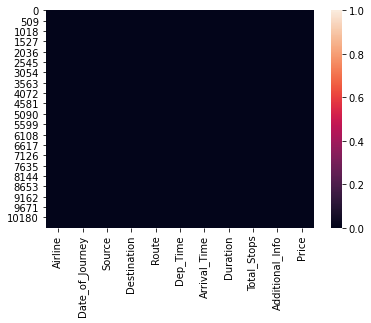

In [11]:
sns.heatmap(df.isnull())

as only 1 null value in route and total stops each, we are dropping these rows.

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(10682, 11)

In [14]:
print("Unique values of each columns with counts-")
for i in df.columns:
    if df[i].dtypes == object:
        print(i,'=')
        print(df[i].value_counts())
        print('\n')

Unique values of each columns with counts-
Airline =
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


Date_of_Journey =
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257

Date of journey is quite distributed 

Source & distribution are also distributed

ROute column & additional info  we will  drop it.

In [15]:
print("duplicate values")
df[df.duplicated()]

duplicate values


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


SO there are duplicate values are presnt in the dataset.

In [16]:
df.drop_duplicates(keep='first',inplace=True)

In [17]:
df.shape

(10462, 11)

Now we are with 10462 rows & 11 columns

In [18]:
df['journey_day'],df['journey_month'],df['journey_year']=df['Date_of_Journey'].str.split('/',3).str

so we have to split Date of journey into day,moth,& year

In [19]:
df['dep_hour'],df['dep_mins']=df['Dep_Time'].str.split(':',2).str

Also doing for departure time.

In [20]:
df['arr_hour'],df['arr_mins']=df['Arrival_Time'].str.split(':',2).str

for arrival time

In [21]:
df['Total_Stops'] = df['Total_Stops'].map({
    'non-stop':0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4
})

for total stops i have mapped into integer 

In [22]:
df['Duration']=df['Duration'].str.replace('h ',':').str.replace('m','')

In [23]:
df['Duration_hour'],df['Duration_Minutes']= df['Duration'].str.split(':',2).str

In [24]:
#dropping few columns which are of no use for result now.
df.drop(columns=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Additional_Info'],axis=1,inplace=True)

In [25]:
df['journey_year'].unique()

array(['2019'], dtype=object)

In [26]:
df.drop(columns=['journey_year'],axis=1,inplace=True)

In [27]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_mins,arr_hour,arr_mins,Duration_hour,Duration_Minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,03,22,20,01,10 22 Mar,2,50
1,Air India,Kolkata,Banglore,2,7662,1,05,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,06,09,25,04,25 10 Jun,19h,NaN
3,IndiGo,Kolkata,Banglore,1,6218,12,05,18,05,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,01,03,16,50,21,35,4,45


In [28]:
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Price                  0
journey_day            0
journey_month          0
dep_hour               0
dep_mins               0
arr_hour               0
arr_mins               0
Duration_hour          0
Duration_Minutes    1006
dtype: int64

So there is so many null values present in the duration_Minutes. 

In [29]:
df['Duration_Minutes'].unique()

array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [30]:
df['Duration_Minutes'].fillna(0,inplace=True)

replacing null values in duration minutes with 0.

In [31]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Price               0
journey_day         0
journey_month       0
dep_hour            0
dep_mins            0
arr_hour            0
arr_mins            0
Duration_hour       0
Duration_Minutes    0
dtype: int64

Now, no null values are presnt.

In [32]:
df.dtypes

Airline             object
Source              object
Destination         object
Total_Stops          int64
Price                int64
journey_day         object
journey_month       object
dep_hour            object
dep_mins            object
arr_hour            object
arr_mins            object
Duration_hour       object
Duration_Minutes    object
dtype: object

we should convert this journey_day,journey_month,dep_hour,dep_mins,arr_hours,arr_mins,Duration_hour,Duration_minutes into int.

In [33]:
new_col=['journey_day','journey_month','dep_hour','dep_mins','arr_hour','arr_mins','Duration_hour','Duration_Minutes']
for i in new_col:
    df[i]=pd.to_numeric(df[i],errors='coerce')

In [34]:
df.dtypes

Airline              object
Source               object
Destination          object
Total_Stops           int64
Price                 int64
journey_day           int64
journey_month         int64
dep_hour              int64
dep_mins              int64
arr_hour              int64
arr_mins            float64
Duration_hour       float64
Duration_Minutes      int64
dtype: object

In [35]:
df.shape

(10462, 13)

# Data Visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

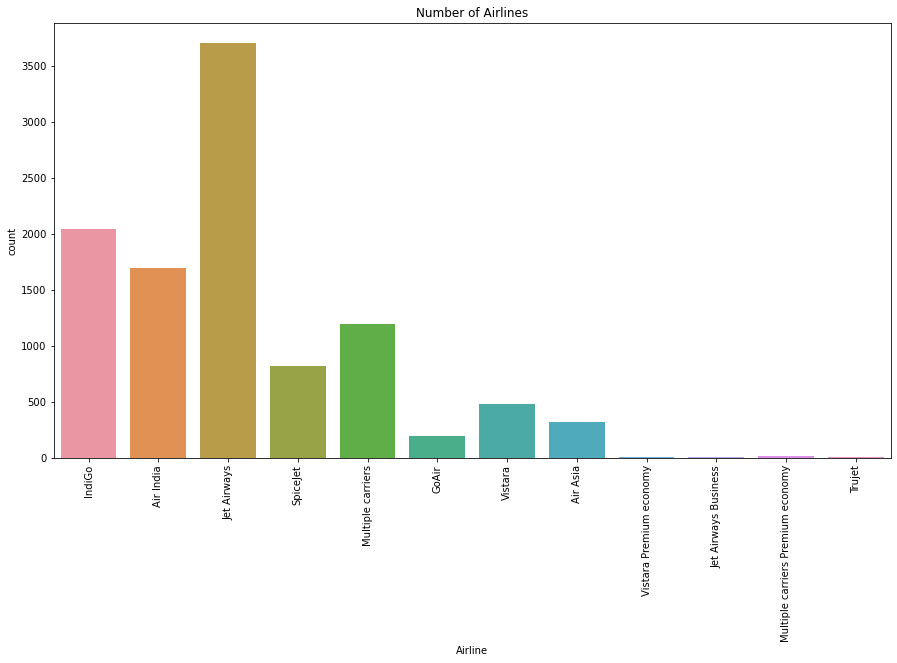

In [36]:
plt.figure(figsize=(15,8))
sns.countplot(df['Airline'])
plt.title('Number of Airlines')
plt.xticks(rotation=90)

Jet Airways is having the  highest count and  vistara premium, jet airways business, multiple carriers business and trujet, having least count

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

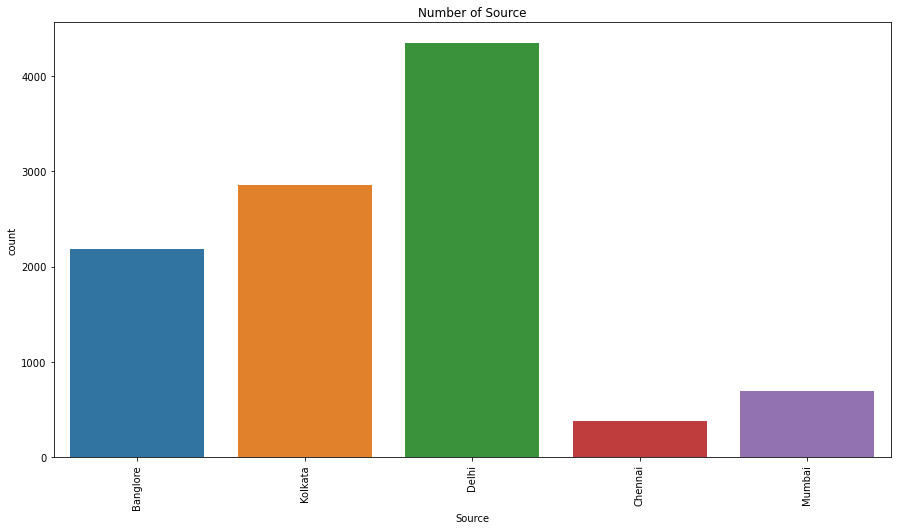

In [37]:
plt.figure(figsize=(15,8))
sns.countplot(df['Source'])
plt.title('Number of Source')
plt.xticks(rotation=90)

Delhi is having the highest count & chennai is having the least

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

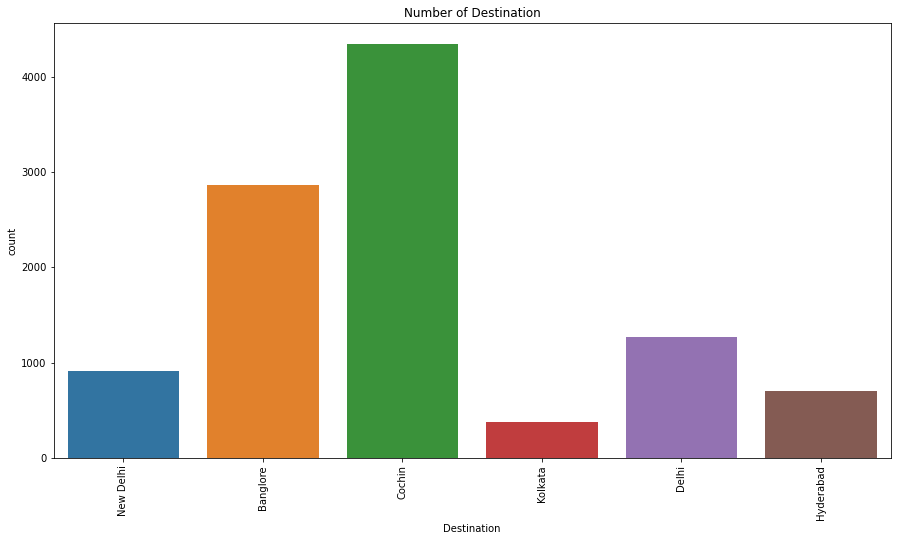

In [38]:
plt.figure(figsize=(15,8))
sns.countplot(df['Destination'])
plt.title('Number of Destination')
plt.xticks(rotation=90)

Cochin is having the highest count & kolkata is at least

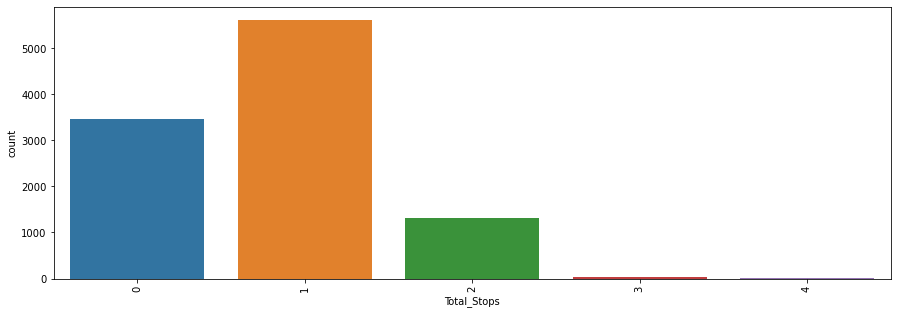

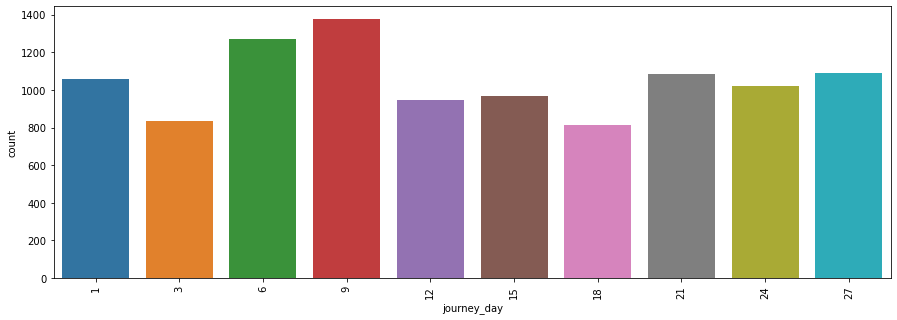

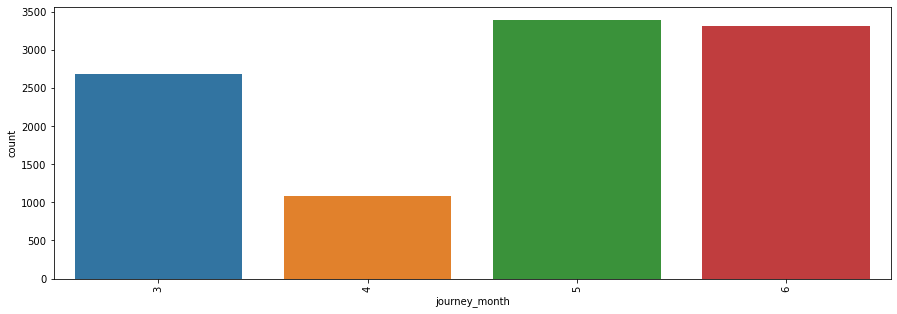

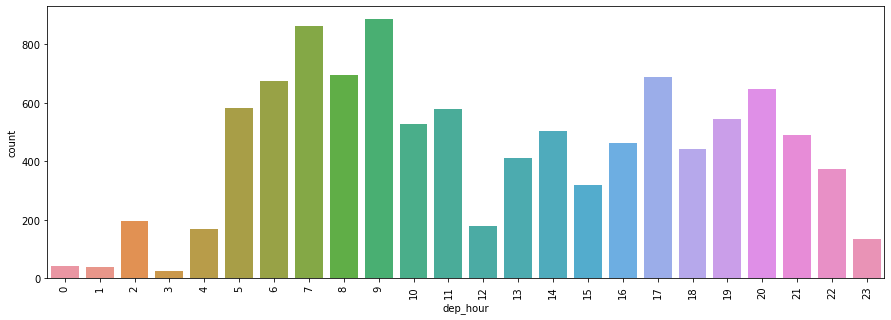

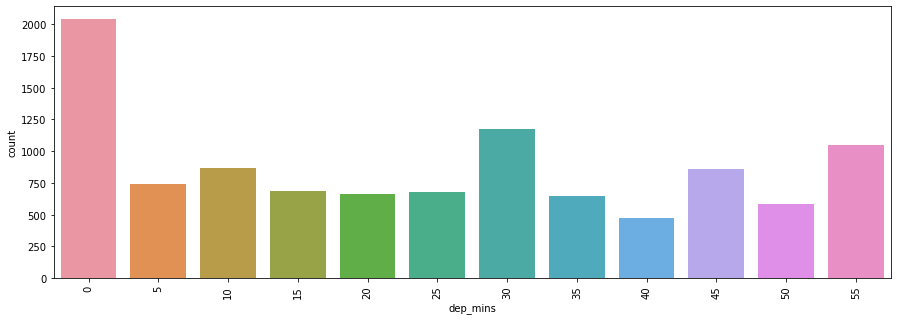

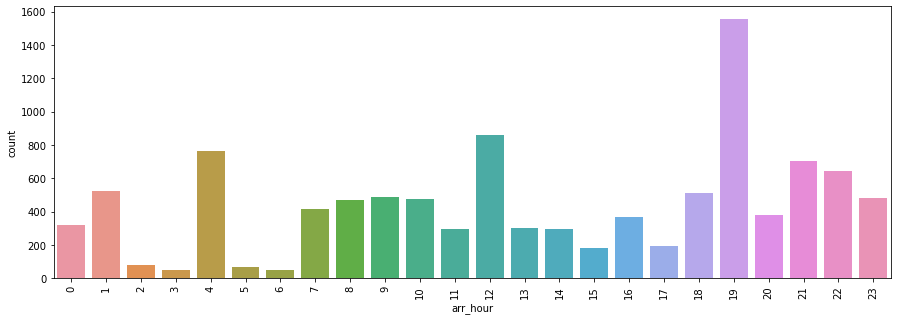

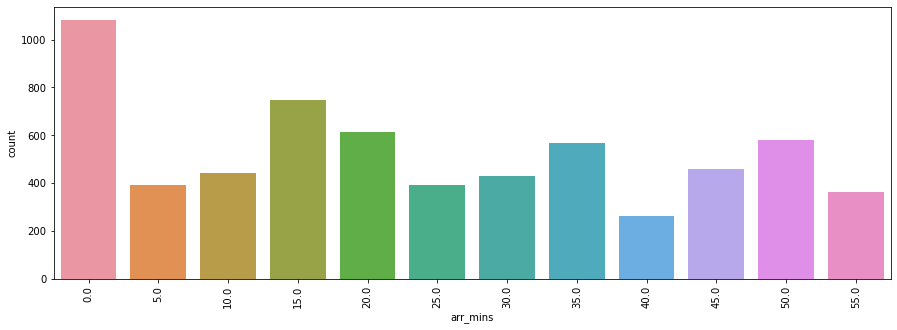

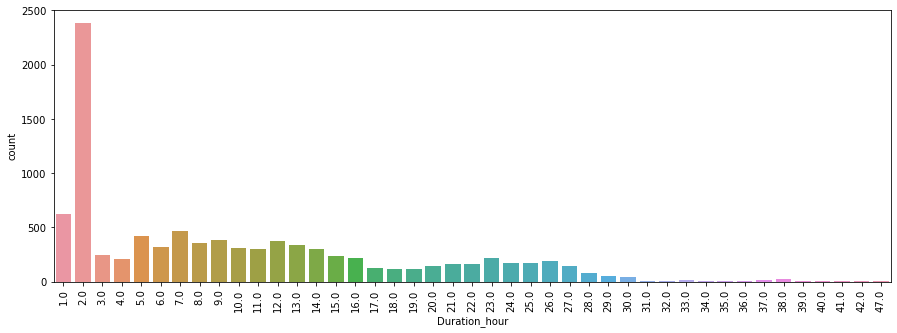

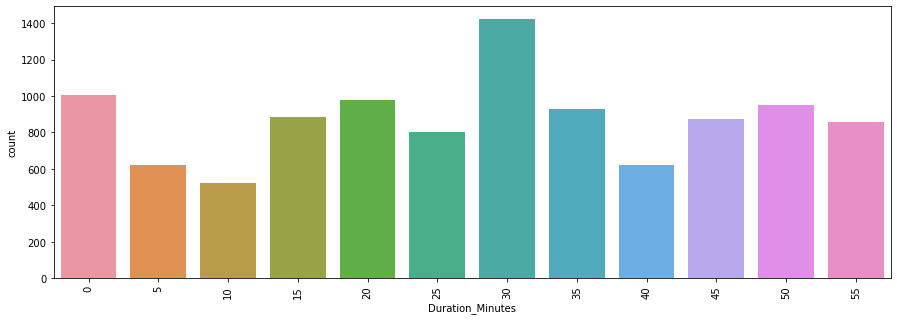

In [39]:
for i in df.columns:
    if df[i].dtypes!=object and i!="Price":
        plt.figure(figsize=(15,5))
        sns.countplot(df[i])
        plt.xticks(rotation=90)
        plt.show()

From the above we can see that-

Maximum number of flights have 1 stopage.

Maximum journeys are done on 9th day of the month.

Majority of flights fly in 5th and 6th month of the year.

Maximum flights departs at 9 in the morning.

Arrival time for maximum number of flights is 7pm(19) in the evening.

Duration of most of the flights is between 2 hrs.

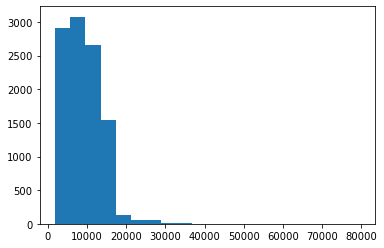

In [40]:
plt.hist(df['Price'],bins=20)
plt.show()

Flight price data is skewed.

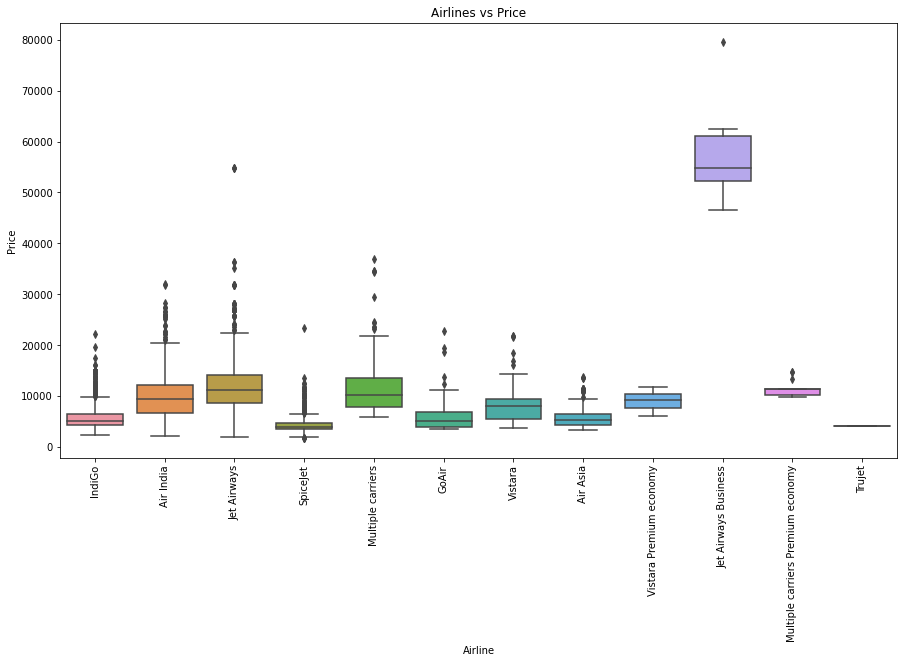

In [41]:
plt.figure(figsize=(15,8))
sns.boxplot(df['Airline'], df['Price'])
plt.title('Airlines vs Price')
plt.xticks(rotation=90)
plt.show()

there are few outliers present in some airlines

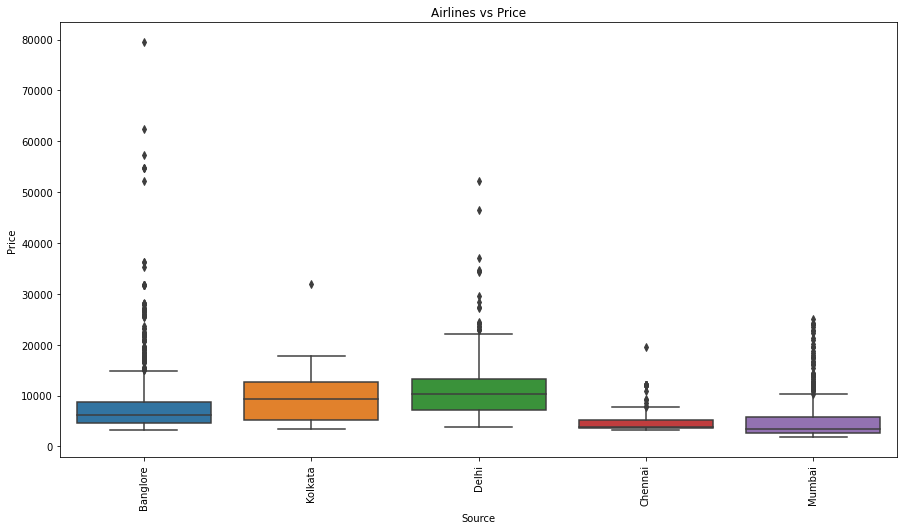

In [42]:
plt.figure(figsize=(15,8))
sns.boxplot(df['Source'], df['Price'])
plt.title('Airlines vs Price')
plt.xticks(rotation=90)
plt.show()

Maximum outliers present in banglore & delhi source airport

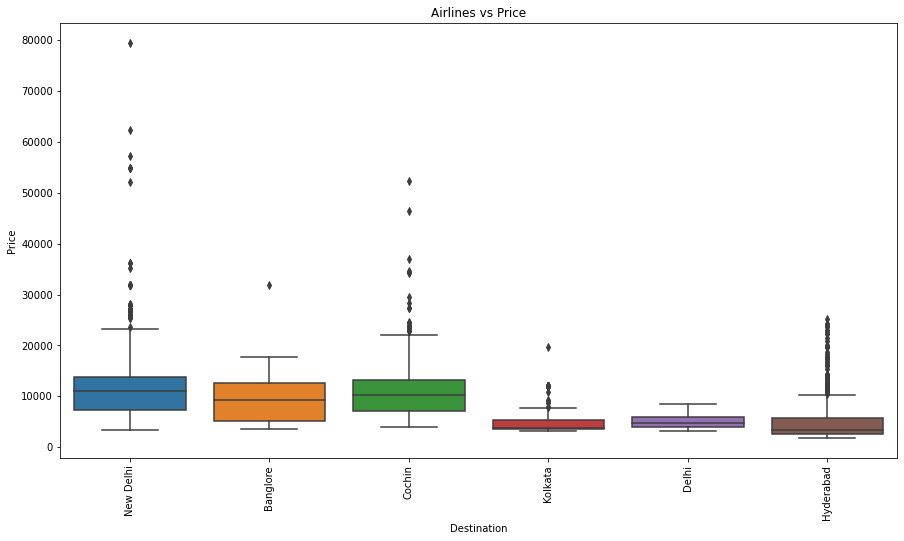

In [43]:
plt.figure(figsize=(15,8))
sns.boxplot(df['Destination'], df['Price'])
plt.title('Airlines vs Price')
plt.xticks(rotation=90)
plt.show()

HIghest outlier presnt in delhi destination airport only

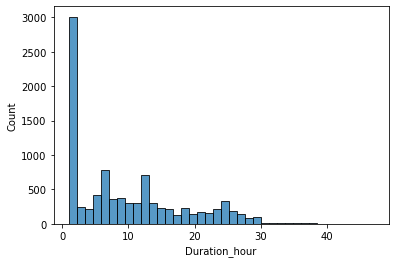

In [44]:
sns.histplot(df["Duration_hour"])
plt.show()

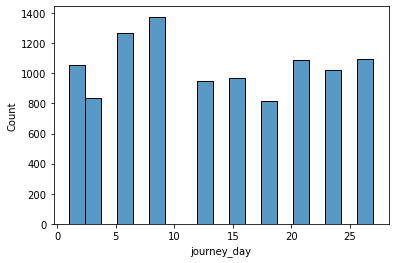

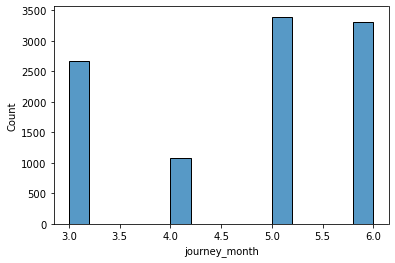

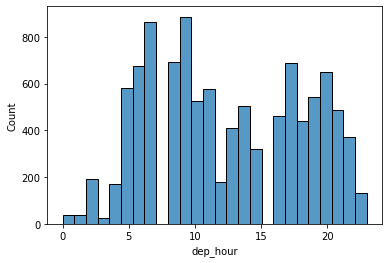

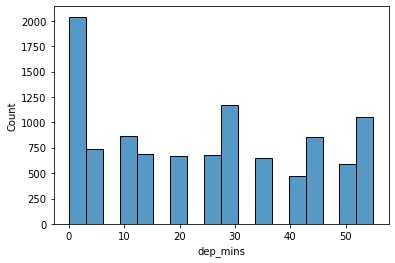

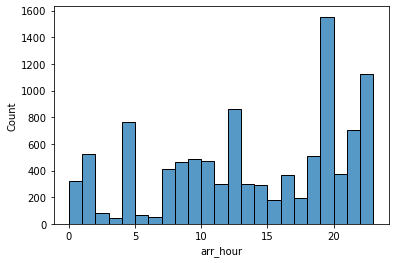

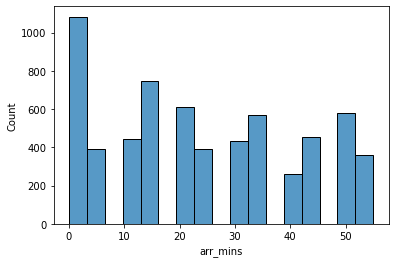

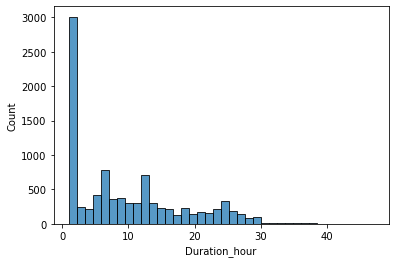

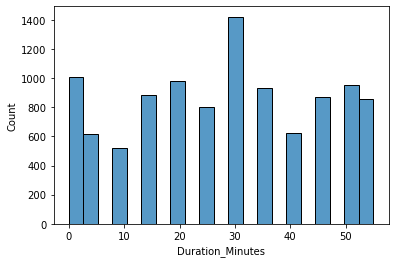

In [45]:
lis_col=['journey_day','journey_month','dep_hour','dep_mins','arr_hour','arr_mins','Duration_hour','Duration_Minutes']
for i in lis_col:
    sns.histplot(df[i])
    plt.show()

# Correlation

In [46]:
print('Data description')
df.describe().T

Data description


,count,mean,std,min,25%,50%,75%,max
Total_Stops,10462.0,0.802332,0.660609,0.0,0.0,1.0,1.00,4.0
Price,10462.0,9026.790289,4624.849541,1759.0,5224.0,8266.0,12344.75,79512.0
journey_day,10462.0,13.463200,8.467493,1.0,6.0,12.0,21.00,27.0
journey_month,10462.0,4.701491,1.163802,3.0,3.0,5.0,6.00,6.0
dep_hour,10462.0,12.478494,5.727227,0.0,8.0,11.0,18.00,23.0
dep_mins,10462.0,24.404989,18.815719,0.0,5.0,25.0,40.00,55.0
arr_hour,10462.0,13.387689,6.855547,0.0,8.0,14.0,19.00,23.0
arr_mins,6320.0,24.067247,17.839362,0.0,10.0,20.0,40.00,55.0
Duration_hour,9457.0,9.912975,8.403826,1.0,2.0,8.0,15.00,47.0
Duration_Minutes,10462.0,28.209711,16.879913,0.0,15.0,30.0,45.00,55.0


The minimum price of a flight is 1759 and maximum is 79512 and there is 4624 of standard devaiation.
And, most fo the columns are not having huge difference between 75% & maximum

<AxesSubplot:>

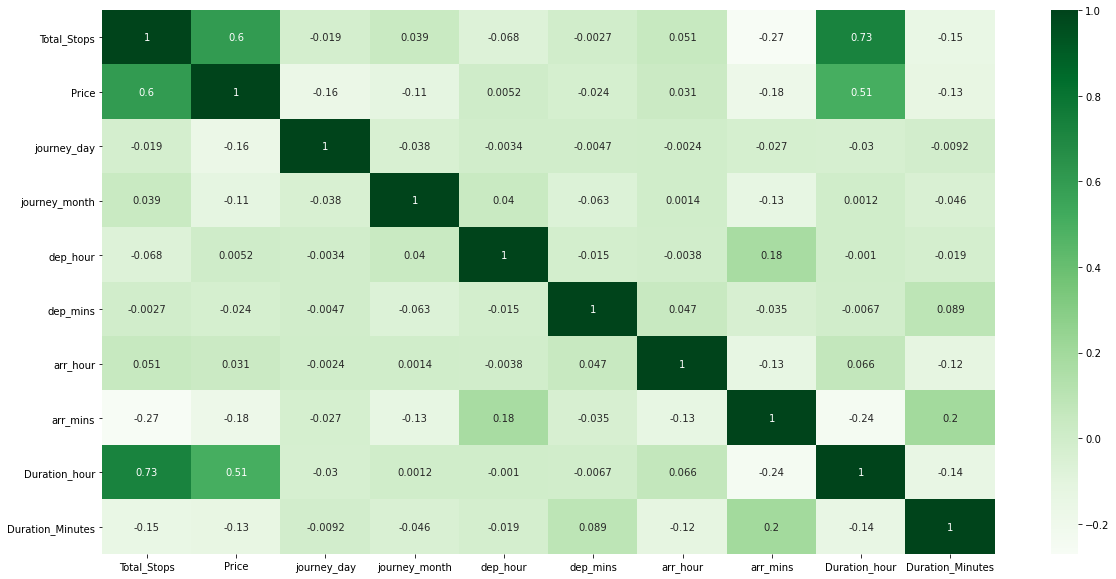

In [47]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

From the above plot we can see that-

Price and total stops are strongly correlated.

price and duration hr are also positively correlated.

Total stops and duration hr are stongly correlated.

# Data Cleaning

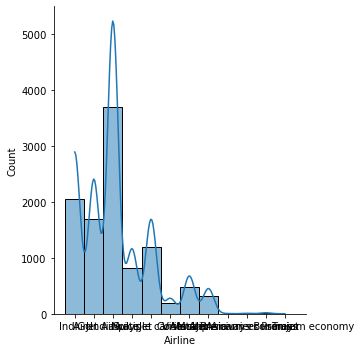

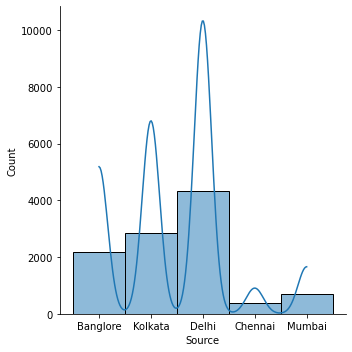

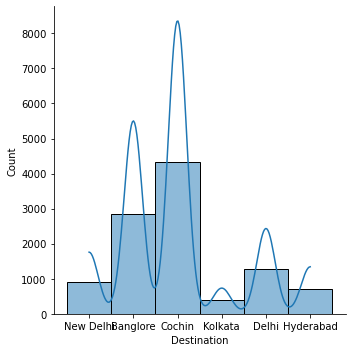

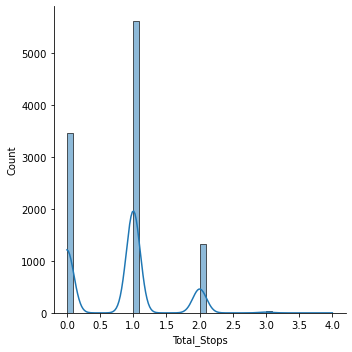

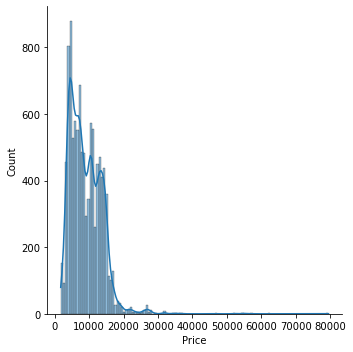

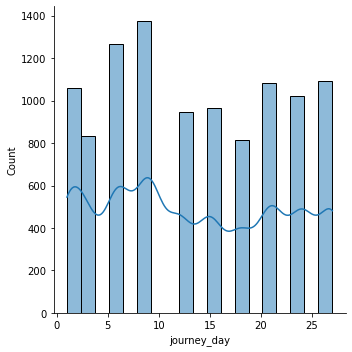

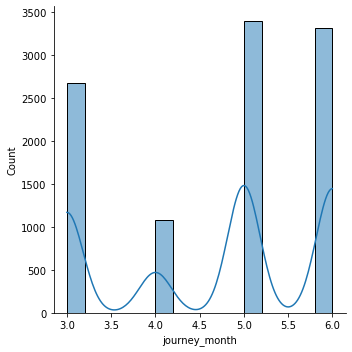

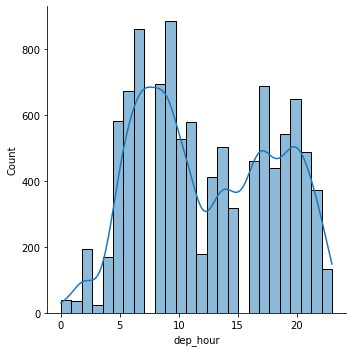

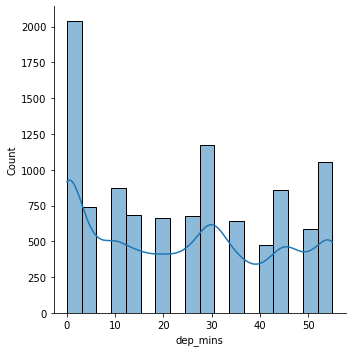

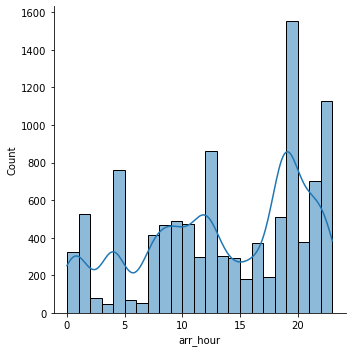

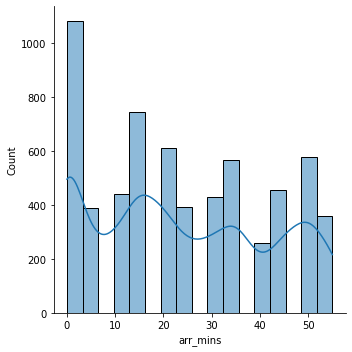

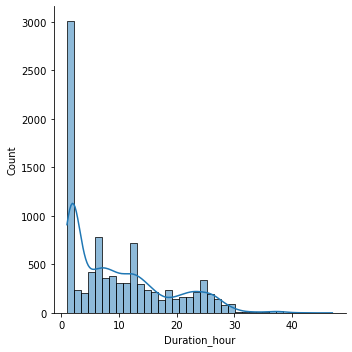

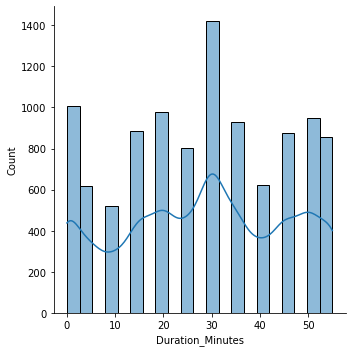

In [48]:
for i in df.columns:
    sns.displot(df[i],kde=True)
    plt.show()

defintely not normal distribution for every columns

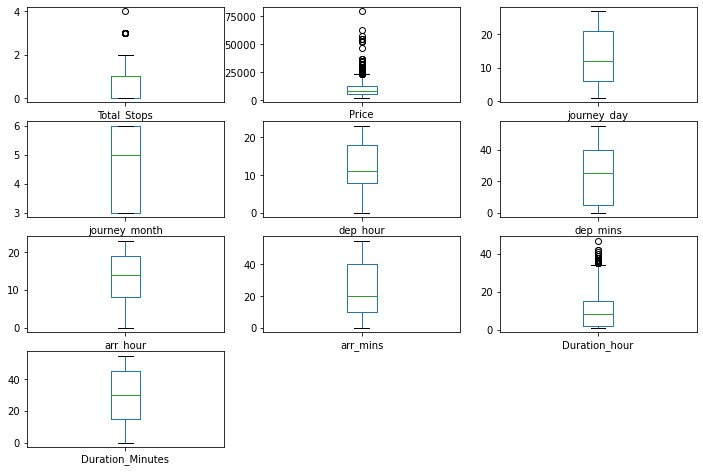

In [49]:
df.plot(kind='box',subplots=True,layout=(12,3),figsize=(12,25))
plt.show()

very few outliers are presnt in dataset, we are not applying zscore for outliers.

# Label Encoding

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes==object:
        df[i] = le.fit_transform(df[i])

In [51]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_mins,arr_hour,arr_mins,Duration_hour,Duration_Minutes
0,3,0,5,0,3897,24,3,22,20,1,NaN,2.0,50
1,1,3,0,2,7662,1,5,5,50,13,15.0,7.0,25
2,4,2,1,2,13882,9,6,9,25,4,NaN,NaN,0
3,3,3,0,1,6218,12,5,18,5,23,30.0,5.0,25
4,3,0,5,1,13302,1,3,16,50,21,35.0,4.0,45


In [52]:
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Price                  0
journey_day            0
journey_month          0
dep_hour               0
dep_mins               0
arr_hour               0
arr_mins            4142
Duration_hour       1005
Duration_Minutes       0
dtype: int64

In [53]:
df.shape

(10462, 13)

so as we can see that there is null values are presnt in arrival mins & duration hour, we are replacing it with median.

In [54]:
df['arr_mins'].fillna(df['arr_mins'].median(),inplace=True)
df['Duration_hour'].fillna(df['Duration_hour'].median(),inplace=True)

In [55]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Price               0
journey_day         0
journey_month       0
dep_hour            0
dep_mins            0
arr_hour            0
arr_mins            0
Duration_hour       0
Duration_Minutes    0
dtype: int64

now no null values are there in dataste

Now we are going to split that into target variable & feature column

In [56]:
x = df.drop(['Price'],axis=1)
y = df['Price']

# Checking Skewness

In [57]:
x.skew()

Airline             0.723567
Source             -0.419669
Destination         1.225081
Total_Stops         0.332309
journey_day         0.124628
journey_month      -0.377535
dep_hour            0.108306
dep_mins            0.171301
arr_hour           -0.378978
arr_mins            0.586769
Duration_hour       0.988742
Duration_Minutes   -0.085972
dtype: float64

so as there is negligible skewness, we r not going to handle the skewness

In [58]:
y.skew()

1.8574899082173875

as in target variable alot of skewness present which is going to affect our result.

In [59]:
#Removing skewness using log transformation (keeping +/- 0.5 as the range for skewness)
y=np.log1p(y)

In [71]:
y.skew()

-0.22810645508629535

# Standard Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
k=sc.fit_transform(x)
x=pd.DataFrame(k,columns = x.columns)

In [61]:
x.head()

,Airline,Source,Destination,Total_Stops,journey_day,journey_month,dep_hour,dep_mins,arr_hour,arr_mins,Duration_hour,Duration_Minutes
0,-0.414916,-1.646877,2.404213,-1.214593,1.244442,-1.462080,1.662578,-0.234123,-1.807045,-0.175421,-0.965014,1.290962
1,-1.260756,0.882057,-0.972012,1.813062,-1.471958,0.256507,-1.305841,1.360364,-0.056554,-0.532406,-0.340750,-0.190159
2,0.008004,0.039079,-0.296767,1.813062,-0.527123,1.115800,-0.607390,0.031625,-1.369422,-0.175421,-0.215897,-1.671280
3,-0.414916,0.882057,-0.972012,0.299235,-0.172810,0.256507,0.964126,-1.031367,1.402189,0.538548,-0.590455,-0.190159
4,-0.414916,-1.646877,2.404213,0.299235,-1.471958,-1.462080,0.614900,1.360364,1.110440,0.895533,-0.715308,0.994738


In [62]:
y.head()

0    8.268219
1    8.944159
2    9.538420
3    8.735364
4    9.495745
Name: Price, dtype: float64

In [63]:
x.shape,y.shape

((10462, 12), (10462,))

# Modeling

In [64]:
#models froms sickit learn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor

#ensemble technique
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [65]:
LR=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test=LR.predict(x_test)
    print('At random state',i,'Training accuracy is:', r2_score(y_train,pred_train))
    print('At random state',i,'Testing accuracy is:',r2_score(y_test,pred_test))
    print('\n')

At random state 0 Training accuracy is: 0.5461660162386738
At random state 0 Testing accuracy is: 0.5555442454264925


At random state 1 Training accuracy is: 0.5436520984331659
At random state 1 Testing accuracy is: 0.5610029433321095


At random state 2 Training accuracy is: 0.5535103450295011
At random state 2 Testing accuracy is: 0.5386566084385334


At random state 3 Training accuracy is: 0.5512083414283132
At random state 3 Testing accuracy is: 0.543727566592712


At random state 4 Training accuracy is: 0.5546799527644082
At random state 4 Testing accuracy is: 0.5345191783116543


At random state 5 Training accuracy is: 0.5461374800132441
At random state 5 Testing accuracy is: 0.5557656401433861


At random state 6 Training accuracy is: 0.5584395248528664
At random state 6 Testing accuracy is: 0.525966053879213


At random state 7 Training accuracy is: 0.5367516816925486
At random state 7 Testing accuracy is: 0.5761447533715274


At random state 8 Training accuracy is: 0.55047962

We are getting best result at 41 & 48. So our random state will be 28 or 48.

In [72]:
#we are splitting data at random satate 48
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=48)

In [73]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7323, 12), (3139, 12), (7323,), (3139,))

Different models for modelling

In [74]:
LS=Lasso()
RD=Ridge()
KNN=KNeighborsRegressor()
RF=RandomForestRegressor()
ADA=AdaBoostRegressor()

In [75]:
model=[LR,LS,RD,KNN,RF,ADA]

In [77]:
for i in model:
    print('\n')
    print('******************',i,'*******************')
    print('\n')
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    pred_t=i.predict(x_train)
    score=i.score(x_train,y_train)
    print('score:',score)
    print('mean absolute error:',mean_absolute_error(y_test,pred))
    print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))
    print('r2_score:',r2_score(y_test,pred))
    cvs=cross_val_score(i, x, y, cv=4)
    print('Cross Validation Score:',cvs.mean())



****************** LinearRegression() *******************


score: 0.5429751145008272
mean absolute error: 0.2747289615371887
Root mean squared error: 0.34035972821260746
r2_score: 0.5633053890972304
Cross Validation Score: 0.5477614472627313


****************** Lasso() *******************


score: 0.0
mean absolute error: 0.4335637743101238
Root mean squared error: 0.5150646857054916
r2_score: -5.766986621913439e-05
Cross Validation Score: -0.0006346365529695808


****************** Ridge() *******************


score: 0.5429751035185273
mean absolute error: 0.27472947656112795
Root mean squared error: 0.34036174176232864
r2_score: 0.5633002221586058
Cross Validation Score: 0.5477616762026516


****************** KNeighborsRegressor() *******************


score: 0.8748068183418833
mean absolute error: 0.15744439961969164
Root mean squared error: 0.22026353650169872
r2_score: 0.8171113678157009
Cross Validation Score: 0.8115102718757025


****************** RandomForestRegressor() 

# From the above observations, we can see that,best model is Random FOrest Regressor is giving the best results with  r2 score-86% , accuracy score- 97%, RMSE- 0.18 and MAE-0.12

# Hyper Parameter Tuning

In [84]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt'],'min_samples_split':[5, 10, 15],'min_samples_leaf':[5, 10]}
gcv=GridSearchCV(RF,parameters)

In [85]:
gcv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10, 15]})

In [86]:
#checking the best parameters
gcv.best_params_

{'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 5}

In [87]:
predgcv=gcv.best_estimator_.predict(x_test)

In [89]:
print('Mean absolute error:',mean_absolute_error(y_test,predgcv))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predgcv)))
print('r2_score:',r2_score(y_test,predgcv))
cv_score=cross_val_score(RF,x,y,cv=5)
print('Cross Val Score is:',cv_score.mean())

Mean absolute error: 0.12574119394460875
Root mean squared error: 0.17865782577001454
r2_score: 0.8796778496333125
Cross Val Score is: 0.8632332785481622


So as we can see that there is improvement in r2 score now comes to 88% and cross val score 86% with mae=0.12 and rmse =0.17

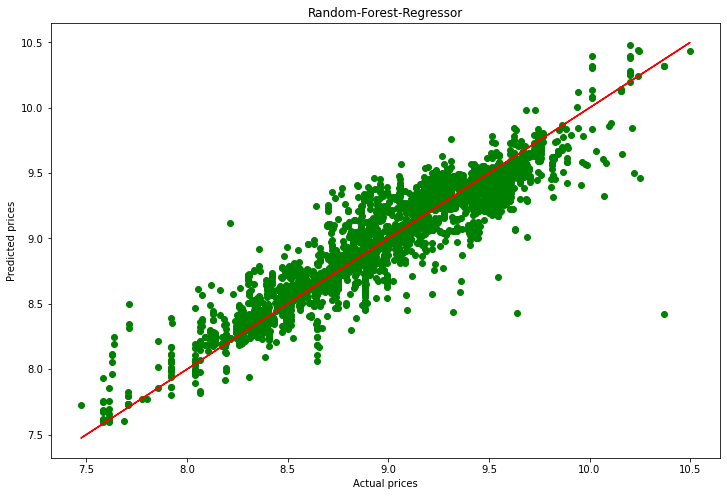

In [92]:
#ploting model results correlation-
plt.figure(figsize=(12,8))
plt.scatter(x=y_test, y=predgcv, color='g')
plt.plot(y_test,y_test,color='r')
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Random-Forest-Regressor')
plt.show()

# Our model showing  a good fitness line

# Model Saving

In [94]:
import joblib
joblib.dump(RF,'Flight_price_pred_rfr.obj')

['Flight_price_pred_rfr.obj']

# Importing testing data

In [95]:
df_test=pd.read_excel('Flight_Test_set.xlsx')

In [96]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [98]:
df_test.shape

(2671, 10)

In [99]:
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [100]:
df_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [101]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [102]:
df_test[df_test.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
294,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,No info
794,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,In-flight meal not included
909,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,20:00,22:55,2h 55m,non-stop,No info
974,Air India,12/06/2019,Kolkata,Banglore,CCU → DEL → AMD → BLR,07:00,05:25 13 Jun,22h 25m,2 stops,No info
1011,Jet Airways,9/05/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 10 May,22h 55m,2 stops,No info
1033,Multiple carriers,15/05/2019,Delhi,Cochin,DEL → BOM → COK,07:30,19:15,11h 45m,1 stop,No info
1044,GoAir,24/03/2019,Banglore,New Delhi,BLR → DEL,20:55,23:50,2h 55m,non-stop,No info
1233,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,No info
1504,Air India,15/06/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 16 Jun,21h 15m,2 stops,No info
1537,Jet Airways,6/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,06:45,04:25 07 Jun,21h 40m,2 stops,In-flight meal not included


In [103]:
df_test.drop_duplicates(keep='first',inplace=True)

In [104]:
df_test.shape

(2645, 10)

Extracting new columns from existing colmns like did in training set

In [106]:
df_test['journey_day'],df_test['journey_month'],df_test['journey_year']=df_test['Date_of_Journey'].str.split('/',3).str

In [107]:
df_test['dep_hour'],df_test['dep_mins']=df_test['Dep_Time'].str.split(':',2).str

In [108]:
df_test['arr_hour'],df_test['arr_mins']=df_test['Arrival_Time'].str.split(':',2).str

In [109]:
df_test['Total_Stops'] = df_test['Total_Stops'].map({
    'non-stop':0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4
})

In [110]:
df_test['Duration']=df_test['Duration'].str.replace('h ',':').str.replace('m','')

In [111]:
df_test['Duration_hour'],df_test['Duration_Minutes']= df_test['Duration'].str.split(':',2).str

In [112]:
#dropping few columns which are of no use for result now.
df_test.drop(columns=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Additional_Info'],axis=1,inplace=True)

In [113]:
df_test['journey_year'].unique()

array(['2019'], dtype=object)

as only 2019 year we can drop this also

In [114]:
df_test.drop(columns=['journey_year'],axis=1,inplace=True)

In [115]:
df_test.tail()

,Airline,Source,Destination,Total_Stops,journey_day,journey_month,dep_hour,dep_mins,arr_hour,arr_mins,Duration_hour,Duration_Minutes
2666,Air India,Kolkata,Banglore,1,6,06,20,30,20,25 07 Jun,23,55
2667,IndiGo,Kolkata,Banglore,0,27,03,14,20,16,55,2,35
2668,Jet Airways,Delhi,Cochin,1,6,03,21,50,04,25 07 Mar,6,35
2669,Air India,Delhi,Cochin,1,6,03,04,00,19,15,15,15
2670,Multiple carriers,Delhi,Cochin,1,15,06,04,55,19,15,14,20


In [116]:
df_test.isnull().sum()

Airline               0
Source                0
Destination           0
Total_Stops           0
journey_day           0
journey_month         0
dep_hour              0
dep_mins              0
arr_hour              0
arr_mins              0
Duration_hour         0
Duration_Minutes    252
dtype: int64

there i null values in duration minutes in testing dataset

In [117]:
df['Duration_Minutes'].unique()

array([50, 25,  0, 45, 30,  5, 15, 35, 10, 20, 55, 40], dtype=int64)

In [118]:
df_test['Duration_Minutes'].fillna(0,inplace=True)

In [119]:
df_test.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
journey_day         0
journey_month       0
dep_hour            0
dep_mins            0
arr_hour            0
arr_mins            0
Duration_hour       0
Duration_Minutes    0
dtype: int64

no null values in dataset.

In [120]:
df_test.dtypes

Airline             object
Source              object
Destination         object
Total_Stops          int64
journey_day         object
journey_month       object
dep_hour            object
dep_mins            object
arr_hour            object
arr_mins            object
Duration_hour       object
Duration_Minutes    object
dtype: object

Except airline,source & destination conveeting into int dtype

In [121]:
new_cols=['journey_day','journey_month','dep_hour','dep_mins','arr_hour','arr_mins','Duration_hour','Duration_Minutes']
for i in new_cols:
    df_test[i]=pd.to_numeric(df_test[i],errors='coerce')

In [123]:
df_test.dtypes

Airline              object
Source               object
Destination          object
Total_Stops           int64
journey_day           int64
journey_month         int64
dep_hour              int64
dep_mins              int64
arr_hour              int64
arr_mins            float64
Duration_hour       float64
Duration_Minutes      int64
dtype: object

# Visualization

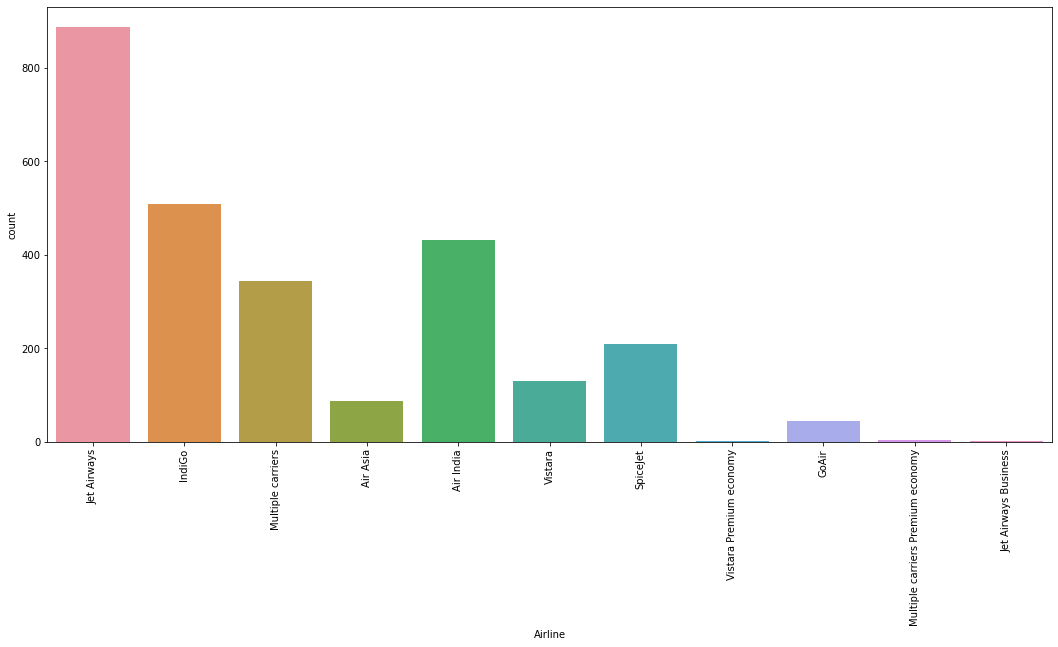

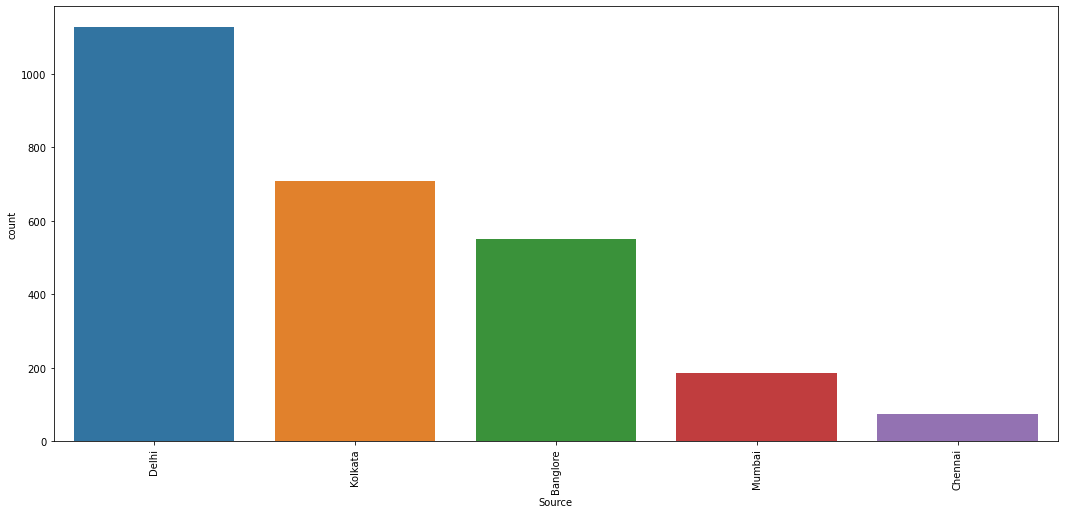

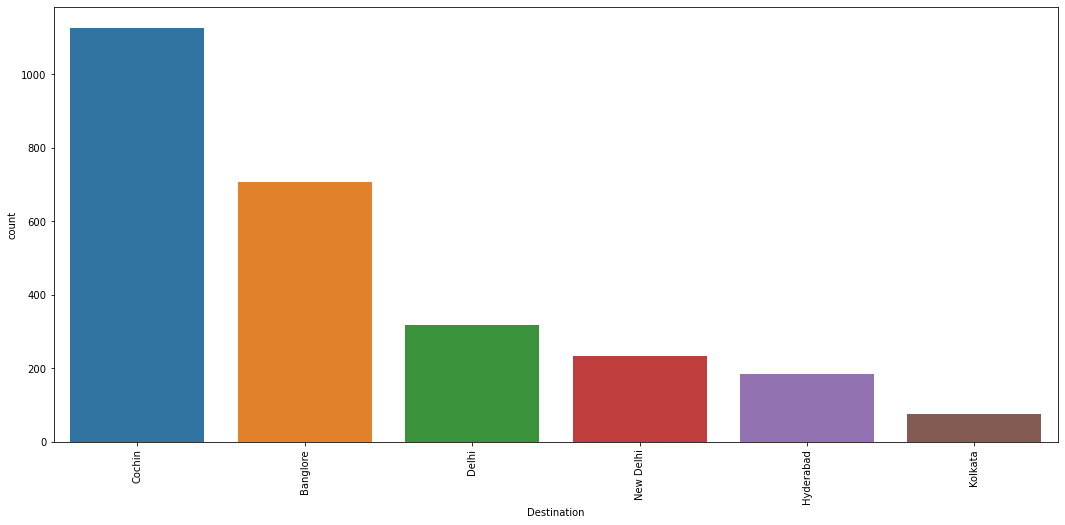

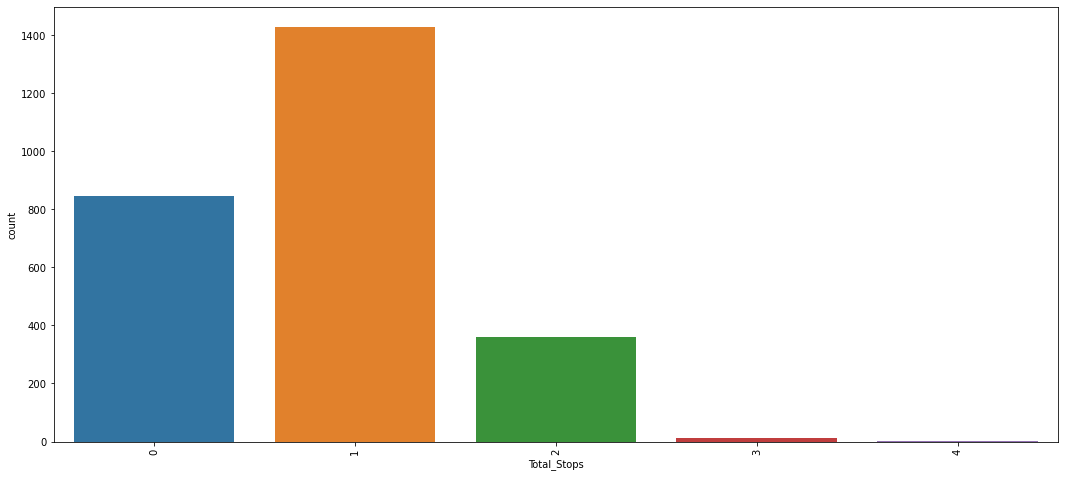

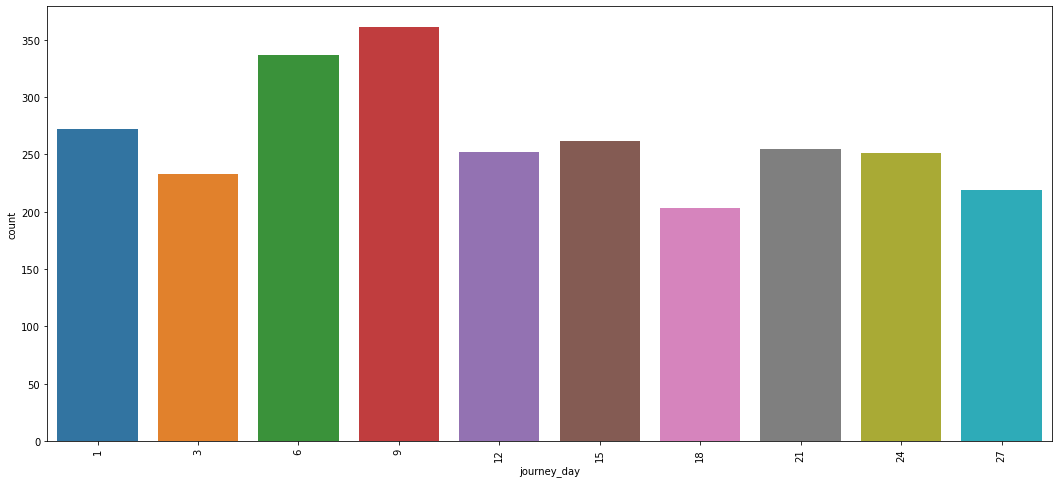

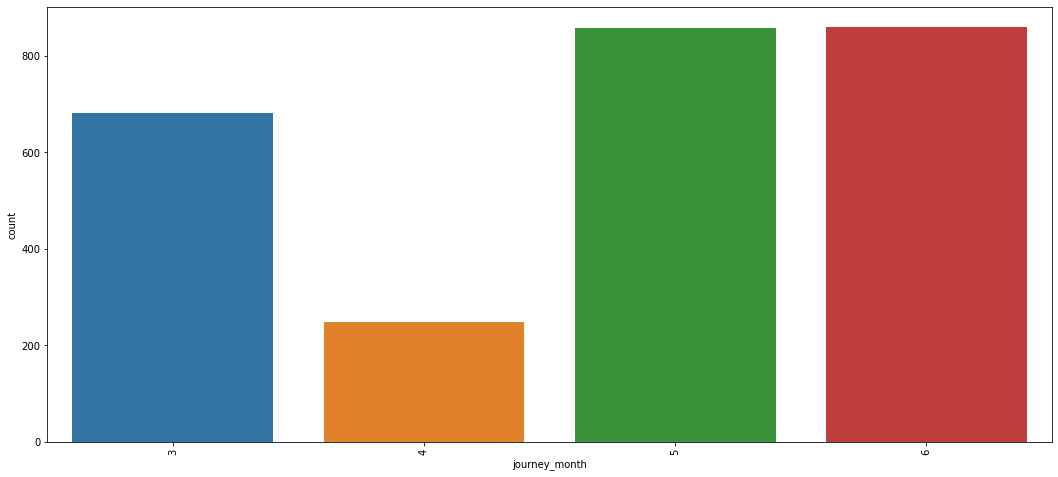

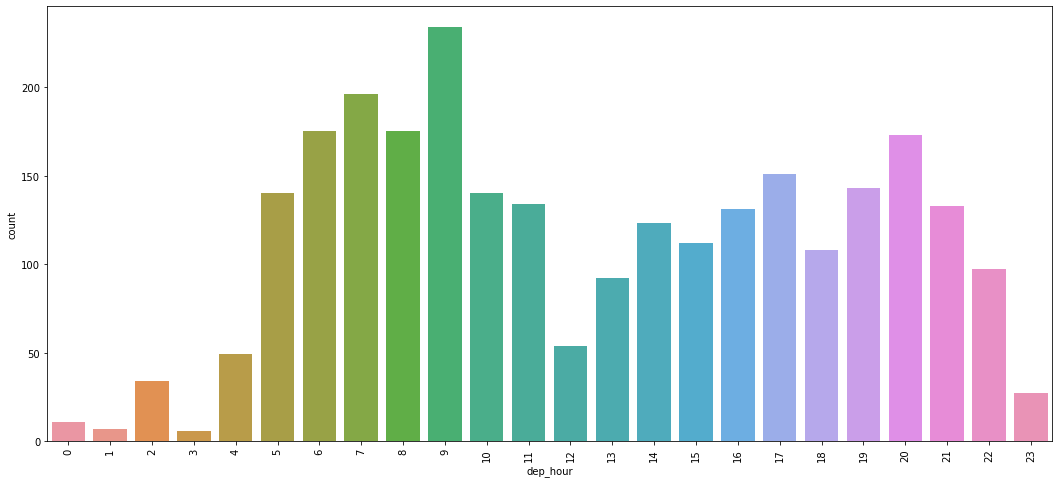

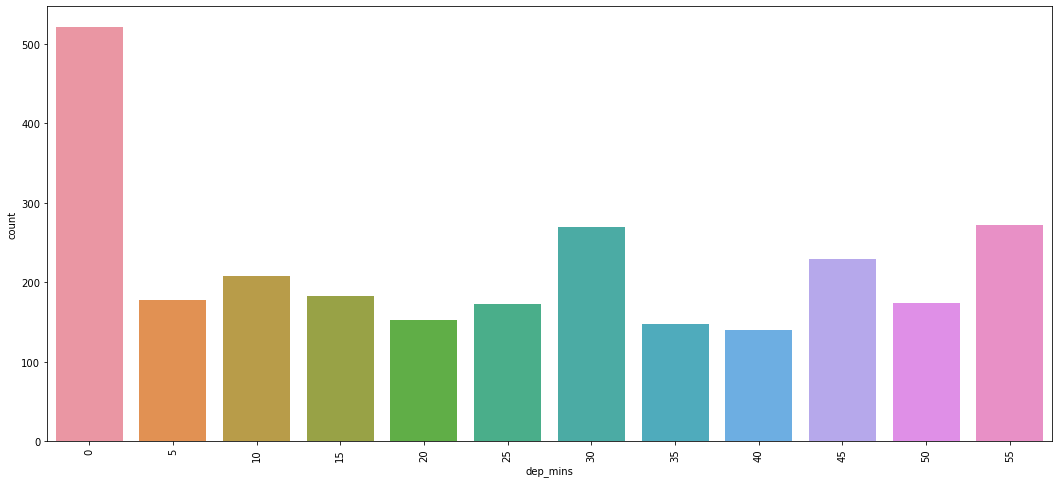

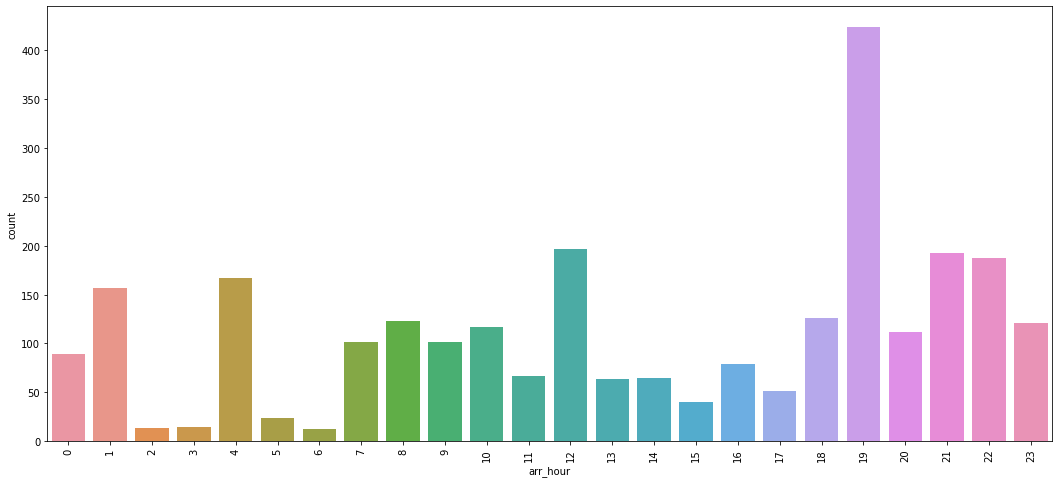

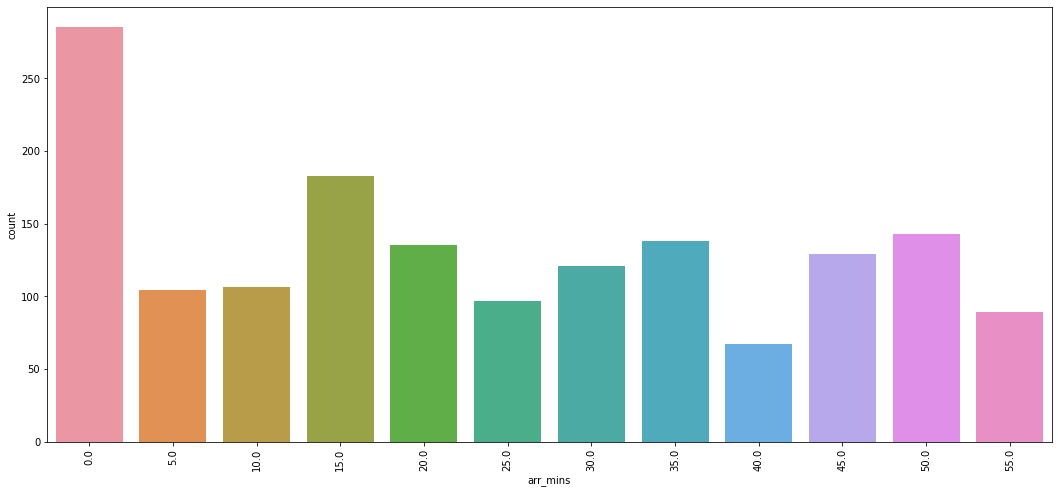

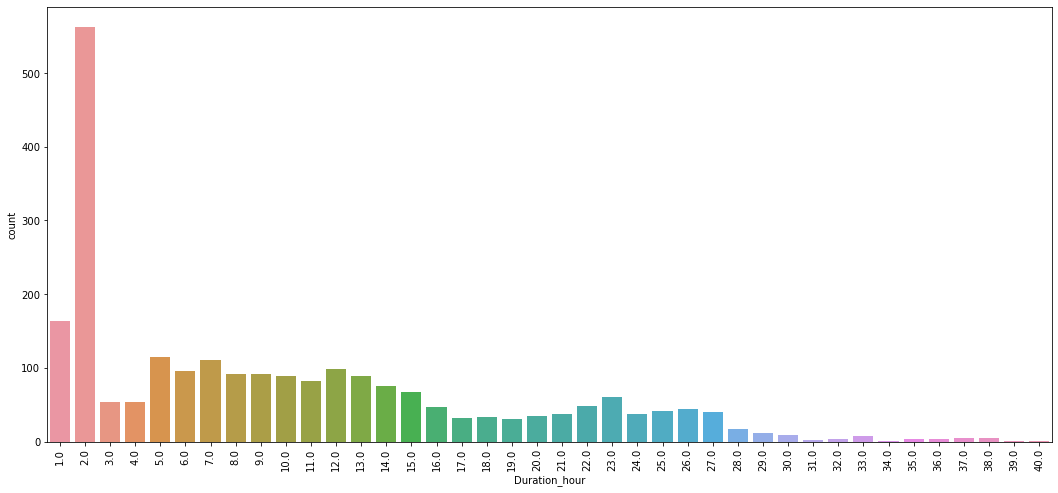

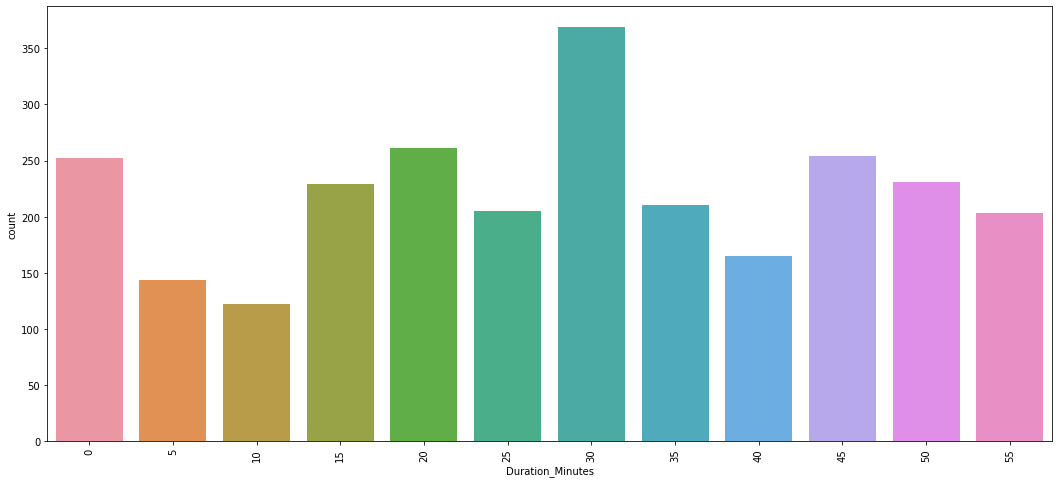

In [124]:
for i in df_test.columns:
    plt.figure(figsize=(18,8))
    sns.countplot(df_test[i])
    plt.xticks(rotation=90)
    plt.show()

# Correlation

In [125]:
df_test.describe()

,Total_Stops,journey_day,journey_month,dep_hour,dep_mins,arr_hour,arr_mins,Duration_hour,Duration_Minutes
count,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,1597.000000,2394.000000,2645.000000
mean,0.825709,12.908129,4.715690,12.615879,24.896030,13.597353,24.070131,10.075188,28.311909
std,0.667670,8.267572,1.170134,5.679266,19.088499,7.025676,17.995477,8.441051,16.718137
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,12.000000,5.000000,12.000000,25.000000,15.000000,20.000000,8.000000,30.000000
75%,1.000000,21.000000,6.000000,18.000000,45.000000,19.000000,40.000000,15.000000,45.000000
max,4.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,40.000000,55.000000


<AxesSubplot:>

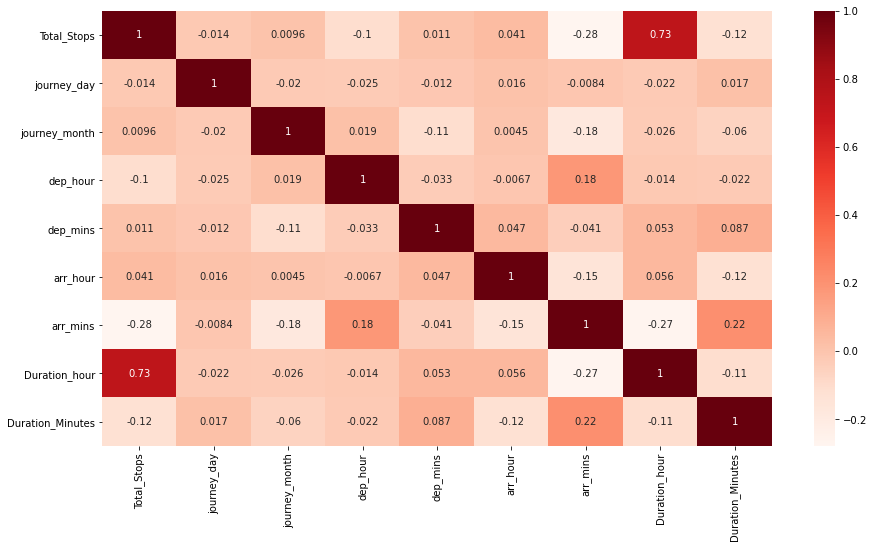

In [130]:
plt.figure(figsize=(15,8))
sns.heatmap(df_test.corr(),annot=True,cmap='Reds')

# Label Encoding

In [131]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_test.columns:
    if df_test[i].dtypes==object:
        df_test[i] = le.fit_transform(df_test[i])

In [132]:
df_test.head()

,Airline,Source,Destination,Total_Stops,journey_day,journey_month,dep_hour,dep_mins,arr_hour,arr_mins,Duration_hour,Duration_Minutes
0,4,2,1,1,6,6,17,30,4,NaN,10.0,55
1,3,3,0,1,12,5,6,20,10,20.0,NaN,0
2,4,2,1,1,21,5,19,15,19,NaN,23.0,45
3,6,2,1,1,21,5,8,0,21,0.0,NaN,0
4,0,0,2,0,24,6,23,55,2,NaN,2.0,50


so as we can see that there is nan values present in arr_mins & duration hour, will fix it.

In [133]:
df_test['arr_mins'].fillna(df_test['arr_mins'].median(),inplace=True)
df_test['Duration_hour'].fillna(df_test['Duration_hour'].median(),inplace=True)

In [134]:
df_test.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
journey_day         0
journey_month       0
dep_hour            0
dep_mins            0
arr_hour            0
arr_mins            0
Duration_hour       0
Duration_Minutes    0
dtype: int64

no null values present in the datatet.

# Importing the model

In [157]:
flight=joblib.load('Flight_price_pred_rfr.obj')

In [158]:
#Predicitng the flight prices
j = flight.predict(df_test)

In [159]:
flight_new = pd.DataFrame(j)
flight_new

,0
0,9.010052
1,9.005355
2,9.010052
3,9.096532
4,9.169276
...,...
2640,8.996321
2641,9.010052
2642,9.010052
2643,9.081268


Inverting log transformation

In [160]:
j=np.expm1(j)

In [161]:
flight_new = pd.DataFrame(j)
flight_new

,0
0,8183.950602
1,8145.592962
2,8183.950602
3,8923.293930
4,9596.677631
...,...
2640,8072.325537
2641,8183.950602
2642,8183.950602
2643,8788.101339


In [162]:
#loading test dataset in random forest
train_x = df_test
pred = RF.predict(train_x)
print(pred)

[9.01005245 9.00535508 9.01005245 ... 9.01005245 9.08126775 9.01005245]


In [163]:
df_test_new = pd.DataFrame(pred)

In [164]:
df_test_new

,0
0,9.010052
1,9.005355
2,9.010052
3,9.096532
4,9.169276
...,...
2640,8.996321
2641,9.010052
2642,9.010052
2643,9.081268


In [165]:
pred=np.expm1(pred)

In [166]:
df_test_new = pd.DataFrame(pred)
df_test_new

,0
0,8183.950602
1,8145.592962
2,8183.950602
3,8923.293930
4,9596.677631
...,...
2640,8072.325537
2641,8183.950602
2642,8183.950602
2643,8788.101339


In [167]:
#Saving the result to excel file
flight_new.to_excel('FLIGHT_PRICE.xlsx', index=False)

In [169]:
F=pd.read_excel('FLIGHT_PRICE.xlsx')
F

,0
0,8183.950602
1,8145.592962
2,8183.950602
3,8923.293930
4,9596.677631
...,...
2640,8072.325537
2641,8183.950602
2642,8183.950602
2643,8788.101339


In [170]:
print("Predicted value",flight_new[5:10])
print("Actual_price",df_test_new[5:10])

Predicted value              0
5  8183.950602
6  8014.525787
7  8386.054509
8  8183.950602
9  8183.950602
Actual_price              0
5  8183.950602
6  8014.525787
7  8386.054509
8  8183.950602
9  8183.950602


Showing exactly the same result. Modeeling is well shaped 

# Completed